<a href="https://colab.research.google.com/github/pikey-msc/CursoDF/blob/master/M4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga información de GITHUB

In [6]:
try:
    !rm -rf CursoDF
except:
    print("No existe la ruta aún")

!git clone "https://github.com/pikey-msc/CursoDF"

Cloning into 'CursoDF'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 82 (delta 31), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (82/82), done.


#Carga de librerías

In [7]:
#Cargar módulo de R en Python
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [8]:
%%R
install.packages("dplyr")
library(dplyr) # "Liberria utilizada para manejar datos"
install.packages("data.table")
library(data.table) # Tratamiento de datos txt
# install.packages("caret")
# library(caret)
# install.packages("e1071")
# library(e1071)
install.packages("NbClust")
library(NbClust)
install.packages("factoextra")
library(factoextra)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_0.8.3.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 1173098 bytes (1.1 MB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: =
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: 

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/di

#K Means (Método de agrupación)
##Idea Intuitiva
El método $K$-means clustering (MacQueen, 1967) agrupa las observaciones en K clusters distintos, donde el número K lo determina el analista antes de ejecutar del algoritmo. K-means clustering encuentra los K mejores clusters, entendiendo como mejor cluster aquel cuya varianza interna (intra-cluster variation) sea lo más pequeña posible. Se trata por lo tanto de un problema de optimización, en el que se reparten las observaciones en K clusters de forma que la suma de las varianzas internas de todos ellos sea lo menor posible. Para poder solucionar este problema es necesario definir un modo de cuantificar la varianza interna.\
Considérense $C_1,\ldots, C_K$ como los sets formados por los índices de las observaciones de cada uno de los clusters. Por ejemplo, el set $C_1$ contiene los índices de las observaciones agrupadas en el cluster 1. La nomenclatura empleada para indicar que la observación i pertenece al cluster $k$ es: $i\in k$. Todos los sets satisfacen dos propiedades:\
*   $C_1 \cup C_2 \cup ... \cup C_K = \{1,...,n\}$. Significa que toda observación pertenece al menos a uno de los $K$ clusters.
*   $C_k \cap C_{k'} = \emptyset$ para todo $k\neq k^\prime$. Implica que los clusters no solapan, ninguna observación pertenece a más de un cluster a la vez.\
Dos de las medidas más comúnmente empleadas definen la varianza interna de un cluster $(W(Ck))$ como:
* La suma de las distancias euclídeas al cuadrado entre cada observación ($x_i$) y el centroide ($μ$) de su cluster. Esto equivale a la suma de cuadrados internos del *cluster*.\
$$W(C_k) = \sum_{x_i,\in C_k} (x_{i} - \mu_k)^2$$
* La suma de las distancias euclídeas al cuadrado entre todos los pares de observaciones que forman el *cluster*, dividida entre el número de observaciones del cluster.
$$W(C_k) = \frac{1}{|C_k|} \sum_{i,i' \in C_k} \sum^p_{j=1}(x_{ij} - x_{i'j})^2$$
Minimizar la suma total de varianza interna $\sum^k_{k=1}W(C_k)$ de forma exacta (encontrar el mínimo global) es un proceso muy complejo debido a la inmensa cantidad de formas en las que n observaciones se pueden dividir en $K$ grupos. Sin embargo, es posible obtener una solución que, aun no siendo la mejor de entre todas las posibles, es muy buena (óptimo local). El algoritmo empleado para ello es:


1.   Asignar aleatoriamente un número entre 1 y $K$ a cada observación. Esto sirve como asignación inicial aleatoria de las observaciones a los clusters.

2.   Iterar los siguientes pasos hasta que la asignación de las observaciones a los clusters no cambie o se alcance un número máximo de iteraciones establecido por el usuario


> * Para cada uno de los clusters calcular su centroide. Entendiendo por centroide la posición definida por la media de cada una de las dimensiones (variables) de las observaciones que forman el cluster. Aunque no es siempre equivalente, puede entenderse como el centro de gravedad.

> * Asignar cada observación al cluster cuyo centroide está más próximo.

Este algoritmo garantiza que, en cada paso, se reduzca la intra-varianza total de los clusters hasta alcanzar un óptimo local. La siguiente imagen muestra cómo van cambiando las asignaciones de las observaciones a medida que se ejecuta cada paso del algoritmo.










<div class="figure">
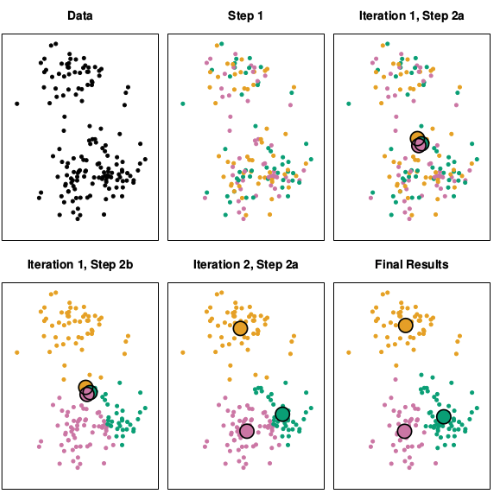
</div>

Otra forma de implementar el algoritmo de *K-means* clustering es la siguiente:
1. Especificar el número K de clusters que se quieren crear.

2. Seleccionar de forma aleatoria $k$ observaciones del set de datos como centroides iniciales.

3. Asignar cada una de las observaciones al centroide más cercano.

4. Para cada uno de los $K$ clusters recalcular su centroide.

5. Repetir los pasos 3 y 4 hasta que las asignaciones no cambien o se alcance el número máximo de iteraciones establecido.

Debido a que el algoritmo de *K-means* no evalúa todas las posibles distribuciones de las observaciones sino solo parte de ellas, los resultados obtenidos dependen de la asignación aleatoria inicial (paso 1). Por esta razón, es importante ejecutar el algoritmo varias veces (25-50), cada una con una asignación aleatoria inicial distinta, y seleccionar aquella que haya conseguido un menor valor de varianza total.

## Ventajas y Desventajas
K-means es uno de los métodos de clustering más utilizados. Destaca por la sencillez y velocidad de su algoritmo, sin embargo, presenta una serie de limitaciones que se deben tener en cuenta.

* Requiere que se indique de antemano el número de clusters que se van a crear. Esto puede ser complicado si no se dispone de información adicional sobre los datos con los que se trabaja. Se han desarrollado varias estrategias para ayudar a identificar potenciales valores óptimos de K (ver más adelante), aunque todas ellas son orientativas.

* Las agrupaciones resultantes pueden variar dependiendo de la asignación aleatoria inicial de los centroides. Para minimizar este problema se recomienda repetir el proceso de clustering entre 25-50 veces y seleccionar como resultado definitivo el que tenga menor suma total de varianza interna. Aun así, solo se puede garantizar la reproducibilidad de los resultados si se emplean semillas.

* Presenta problemas de robustez frente a outliers. La única solución es excluirlos o recurrir a otros métodos de clustering más robustos como K-medoids (PAM).


[1] "Tabla original"
  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa
[1] "Tabla original sin variable respuesta"
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1          5.1         3.5          1.4         0.2
2          4.9         3.0          1.4         0.2
3          4.7         3.2          1.3         0.2
4          4.6         3.1          1.5         0.2
5          5.0         3.6          1.4         0.2
6          5.4         3.9          1.7         0.4
[1] "Tabla estandarizada"
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1   -0.8976739  1.01560199    -1.335752   -1.311052
2   -1.1392005 -0.131

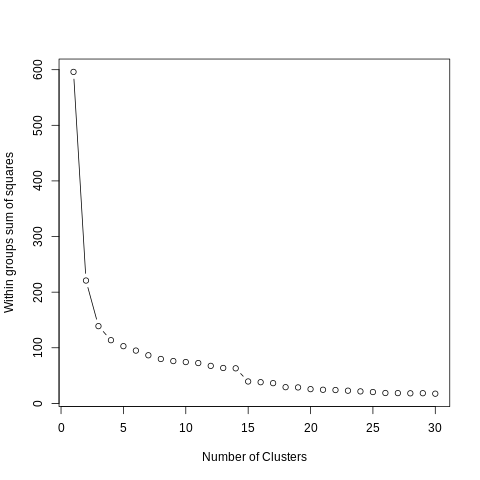

In [12]:
%%R
data(iris)

#Vista de la tabla Iris
print("Tabla original")
print(head(iris))

#Quitar la columna de "Species"
print("Tabla original sin variable respuesta")
iris_2<-iris[-5]
print(head(iris_2))

#Estandardize datos
print("Tabla estandarizada")
iris_3<-as.data.frame(scale(iris_2))
print(head(iris_3))

#Revisar la media y la desviación estándar
print("Media y desviación estándar de la original")
print(sapply(iris_2,mean))
print(sapply(iris_2,sd))
print("Media y desviación estándar de la estandarizada")
print(sapply(iris_3,mean))
print(sapply(iris_3,sd))

# función de gráfica de clusters por suma de cuadrados
wssplot <- function(data, nc=15, seed=1234){
  wss <- (nrow(data)-1)*sum(apply(data,2,var))
  for (i in 2:nc){
    set.seed(seed)
    wss[i] <- sum(kmeans(data, centers=i)$withinss)}
  plot(1:nc, wss, type="b", xlab="Number of Clusters",
       ylab="Within groups sum of squares")}

# ejecuta la gráfica
wssplot(iris_3,nc=30,seed=1234)


[1] "Centroides"
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1    0.3558492  -0.3930869   0.58460377  0.54663615
2    1.3926646   0.2323817   1.15674505  1.21327591
3   -0.4201099  -1.4246794   0.03924137 -0.05279511
4   -0.9987207   0.9032290  -1.29875725 -1.25214931
[1] "Tamaño"
[1] 50 29 22 49
            
              1  2  3  4
  setosa      0  0  1 49
  versicolor 29  2 19  0
  virginica  21 27  2  0


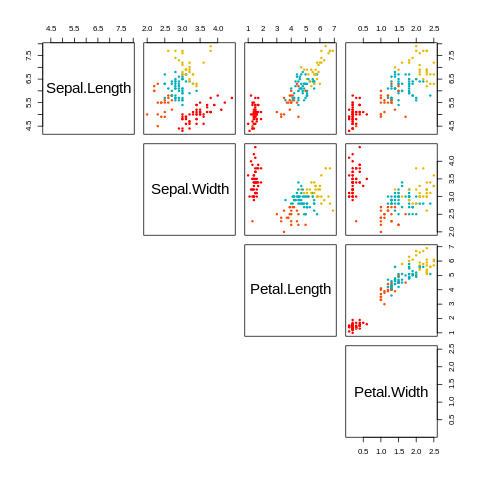

In [13]:
%%R
# Ajustar los clúster
iris_kmeans<-kmeans(iris_3,4)
print("Centroides")
print(iris_kmeans$centers)
print("Tamaño")
print(iris_kmeans$size)
iris$clstr<-iris_kmeans$cluster

# cross-validation with original species available in data

my_cols <- c("#00AFBB", "#E7B800", "#FC4E07", "red", "black", "green", "pink")  
pairs(iris[,1:4], pch = 19,  cex = 0.5,
      col = my_cols[iris$clstr],
      lower.panel=NULL)

iris$clstr<-iris_kmeans$cluster
print(table(iris$Species,iris$clstr))


#Análisis de conglomerados (Jerárquicos)

*Hierarchical clustering* es una alternativa a los métodos de partitioning clustering que no requiere que se pre-especifique el número de clusters. Los métodos que engloba el hierarchical clustering se subdividen en dos tipos dependiendo de la estrategia seguida para crear los grupos:

* *Agglomerative clustering (bottom-up)*: el agrupamiento se inicia en la base del árbol, donde cada observación forma un cluster individual. Los clusters se van combinado a medida que la estructura crece hasta converger en una única “rama” central.

* *Divisive clustering (top-down)*: es la estrategia opuesta al agglomerative clustering, se inicia con todas las observaciones contenidas en un mismo cluster y se suceden divisiones hasta que cada observación forma un cluster individual.

En ambos casos, los resultados pueden representarse de forma muy intuitiva en una estructura de árbol llamada dendrograma.

## Aglomerative

La estructura resultante de un *agglomerative hierarchical clustering* se obtiene mediante un algoritmo sencillo.

1. El proceso se inicia considerando cada una de las observaciones como un cluster individual, formando así la base del dendrograma (hojas).

2. Se inicia un proceso iterativo hasta que todas las observaciones pertenecen a un único cluster:


> > 2.1 Se calcula la distancia entre cada posible par de los $n$ clusters. El investigador debe determinar el tipo de medida emplea para cuantificar la similitud entre observaciones o grupos (distancia y linkage).

> > 2.2 Los dos clusters más similares se fusionan, de forma que quedan $n-1$ clusters.

Determinar dónde cortar la estructura de árbol generada (dendrograma).



La siguiente imagen muestra cómo se van sucediendo las agrupaciones a medida que avanzan las primeras iteraciones del algoritmo.

<div class="figure">
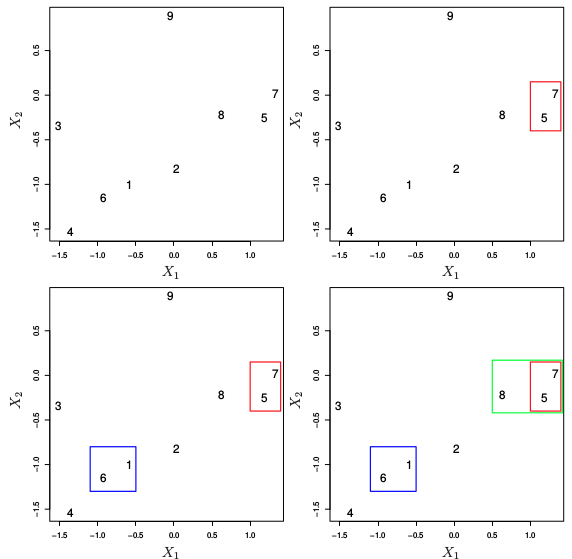

Para que el proceso de agrupamiento pueda llevarse a cabo tal como indica el algoritmo anterior, es necesario definir cómo se cuantifica la similitud entre dos clusters. Es decir, se tiene que extender el concepto de distancia entre pares de observaciones para que sea aplicable a pares de grupos, cada uno formado por varias observaciones. A este proceso se le conoce como linkage. A continuación, se describen los 5 tipos de linkage más empleados y sus definiciones.


* **Complete or Maximum**: Se calcula la distancia entre todos los posibles pares formados por una observación del *cluster* $A$ y una del *cluster* $B$. La mayor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida más conservadora (*maximal intercluster dissimilarity*).

* **Single or Minimum**: Se calcula la distancia entre todos los posibles pares formados por una observación del cluster $A$ y una del cluster $B$. La menor de todas ellas se selecciona como la distancia entre los dos clusters. Se trata de la medida menos conservadora (*minimal intercluster dissimilarity*).

* **Average**: Se calcula la distancia entre todos los posibles pares formados por una observación del cluster $A$ y una del cluster $B$. El valor promedio de todas ellas se selecciona como la distancia entre los dos clusters (mean intercluster dissimilarity).

* **Centroid**: Se calcula el centroide de cada uno de los clusters y se selecciona la distancia entre ellos como la distancia entre los dos clusters.

* **Ward**: Se trata de un método general. La selección del par de clusters que se combinan en cada paso del *agglomerative hierarchical clustering* se basa en el valor óptimo de una función objetivo, pudiendo ser esta última cualquier función definida por el analista. El conocido método Ward’s minimum variance es un caso particular en el que el objetivo es minimizar la suma total de varianza intra-cluster. En cada paso, se identifican aquellos 2 clusters cuya fusión conlleva menor incremento de la varianza total intra-cluster. La implementación en R de este método ha sido causa de confusiones (**Ward’s Hierarchical Agglomerative Clustering Method: Which Algorithms Implement Ward’s Criterion? by Fionn Murtagh y Pierre Legendre**). Si se emplea la función `hclust()` se tiene que especificar `method = "ward.D2"`, mientras que en la función `agnes()` es `method = "ward`".

Los métodos de linkage complete, average y Ward’s minimum variance suelen ser los preferidos por los analistas debido a que generan dendrogramas más compensados. Sin embargo, no se puede determinar que uno sea mejor que otro, ya que depende del caso de estudio en cuestión. Por ejemplo, en genómica, se emplea con frecuencia el método de centroides. Junto con los resultados de un proceso de hierarchical clustering siempre hay que indicar qué distancia se ha empleado, así como el tipo de linkage, ya que, dependiendo de estos, los resultados pueden variar en gran medida.


## Divisive

El algoritmo más conocido de *divisive hierarchical clustering* es DIANA (DIvisive ANAlysis Clustering). Este algoritmo se inicia con un único cluster que contiene todas las observaciones, a continuación, se van sucediendo divisiones hasta que cada observación forma un cluster independiente. En cada iteración, se selecciona el cluster con mayor diametro, entendiendo por diámetro de un cluster la mayor de las diferencias entre dos de sus observaciones. Una vez seleccionado el cluster, se identifica la observación más dispar, que es aquella con mayor distancia promedio respecto al resto de observaciones que forman el cluster, esta observación inicia el nuevo cluster. Se reasignan las observaciones en función de si están más próximas al nuevo cluster o al resto de la partición, dividiendo así el cluster seleccionado en dos nuevos clusters.

Todas las $n$ observaciones forman un único cluster.

Repetir hasta que hayan $n$ clusters:

1. Calcular para cada cluster la mayor de las distancias entre pares de observaciones (diámetro del cluster).

2. Seleccionar el cluster con mayor diámetro.

3. Calcular la distancia media de cada observación respecto a las demas.

4. La observación más distante inicia un nuevo cluster

5. Se reasignan las observaciones restantes al nuevo cluster o al viejo dependiendo de cual está más próximo.

A diferencia del clustering aglomerativo, en el que hay que elegir un tipo de distancia y un método de *linkage*, en el clustering divisivo solo hay que elegir la distancia, no hay *linkage*.


## Dendograma
Para ilustrar cómo se interpreta un dendograma, se simula un set de datos y se somete a un proceso de *hierarchical clustering*.

Supóngase que se dispone de 45 observaciones en un espacio de dos dimensiones, que pertenecen a 3 grupos. Aunque se ha coloreado de forma distinta cada uno de los grupos para facilitar la comprensión de la idea, se va a suponer que se desconoce esta información y que se desea aplicar el método de *hierarchical clustering* para intentar reconocer los grupos.



<div class="figure">
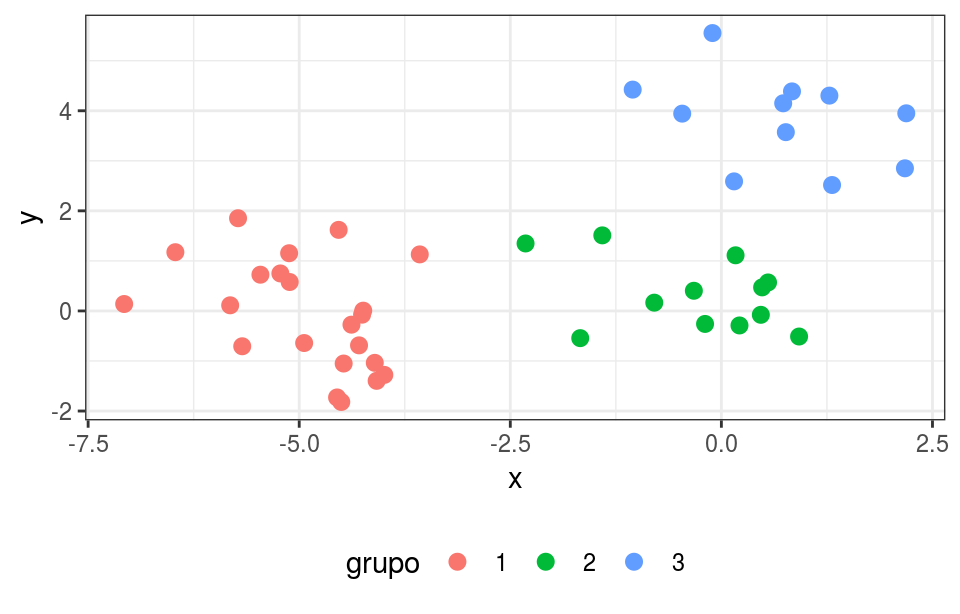

Al aplicar *hierarchical clustering*, empleando como medida de similitud la distancia euclídea y linkage complete, se obtiene el siguiente dendrograma. Como los datos se han simulado en aproximamdamente la misma escala, no es necesario estandarizarlos, de no ser así, sí se tendrían que estandarizar.


<div class="figure">
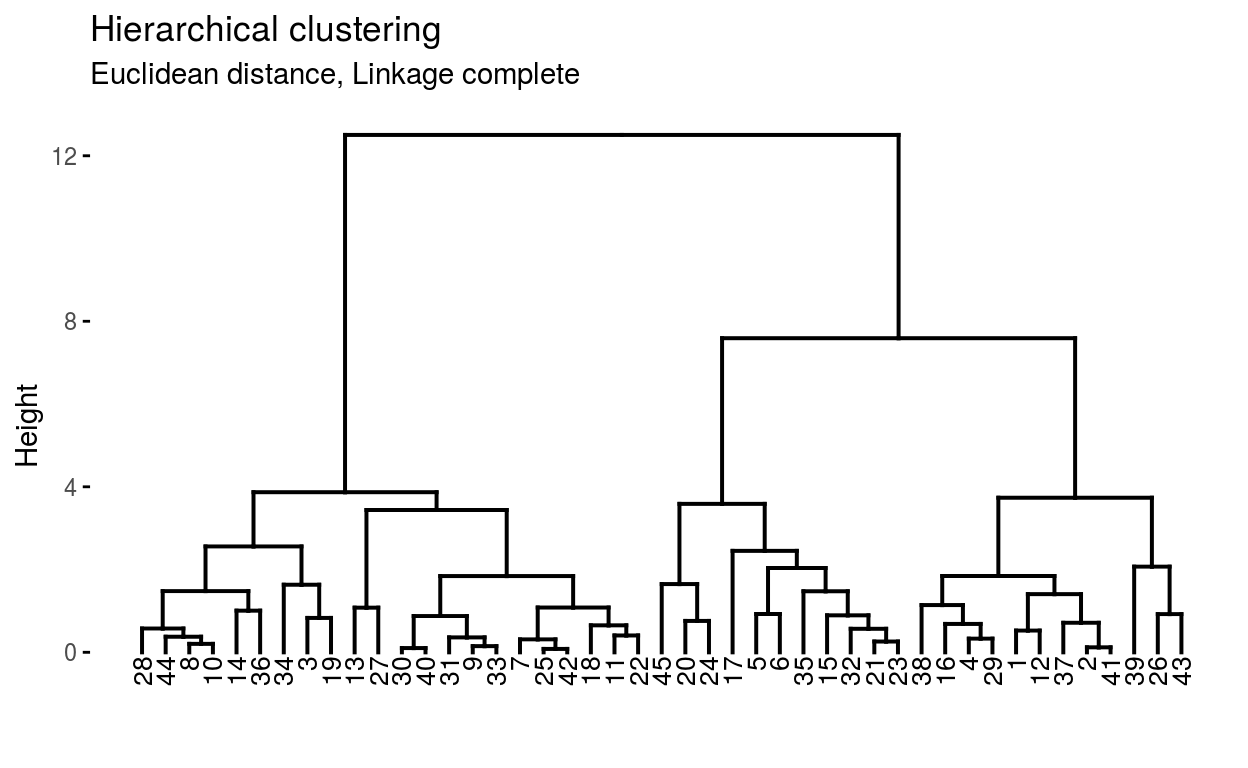

Con base en el dendrograma, cada observación forma una terminación individual conocida como hoja o leaf del árbol. A medida que se asciende por la estructura, pares de hojas se fusionan formando las primeras ramas. Estas uniones (nodos) se corresponden con los pares de observaciones más similares. También ocurre que ramas se fusionan con otras ramas o con hojas. Cuanto más temprana (más próxima a la base del dendrograma) ocurre una fusión, mayor es la similitud. Esto significa que, para cualquier par de observaciones, se puede identificar el punto del árbol en el que las ramas que contienen dichas observaciones se fusionan. La altura a la que esto ocurre (eje vertical) indica cómo de similares/diferentes son las dos observaciones. Los dendrogramas, por lo tanto, se deben interpretar únicamente en base al eje vertical y no por las posiciones que ocupan las observaciones en el eje horizontal, esto último es simplemente por estética y puede variar de un programa a otro. Por ejemplo, la observación 10 es la más similar a la 8 ya que es la primera fusión que recibe la observación 8 (y viceversa). Podría resultar tentador decir que la observación 26, situada inmediatamente a la izquierda de la 8, es la siguiente más similar, sin embargo, las observaciones 28 y 37 son más similares a la 8 a pesar de que se encuentran más alejadas en el eje horizontal. Del mismo modo, no es correcto decir que la observación 28 es más similar a la observación 8 de lo que lo es la 37 por el hecho de que está más próxima en el eje horizontal. Prestando atención a la altura en que las respectivas ramas se unen, la única conclusión válida es que la similitud entre los pares 8-28 y 8-37 es la misma.


In [14]:
%%R
install.packages("factoextra")
library(factoextra)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘viridis’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/zip_2.0.4.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 97756 bytes (95 KB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: downloaded 95 KB


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python

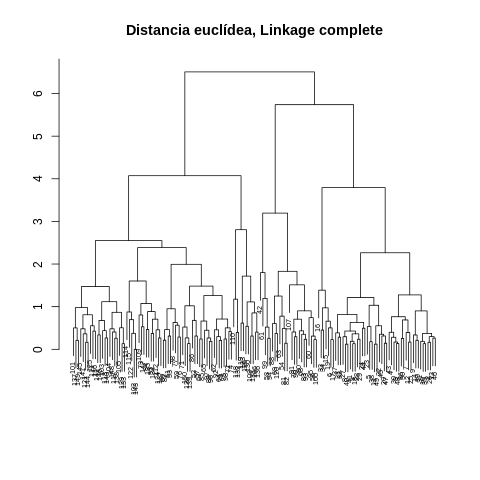

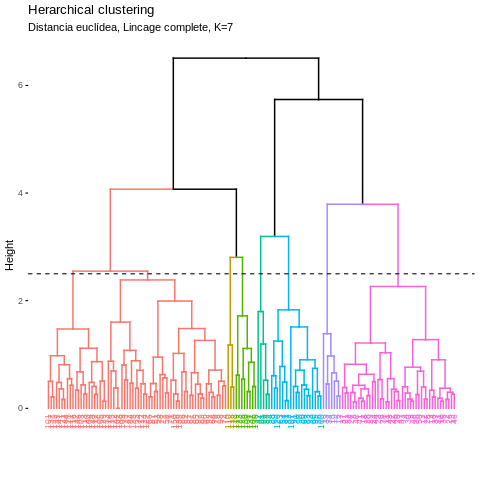

In [15]:
%%R

fviz_cluster(object = iris_kmeans, data = iris[,c(-5,-6)], show.clust.cent = TRUE,
             ellipse.type = "euclid", star.plot = TRUE, repel = TRUE) +
  labs(title = "Resultados clustering K-means") +
  theme_bw() +
  theme(legend.position = "none")  #Gráfica componentes principales

hc_euclidea_completo <- hclust(d = dist(x = iris_3, method = "euclidean"),
                               method = "complete")  #cálculo de distancias euclidianas

hc_euclidea_completo$height
plot(x = hc_euclidea_completo, cex = 0.6, xlab = "", ylab = "", sub = "",
     main = "Distancia euclídea, Linkage complete")  #Dendograma blanco y negro



fviz_dend(x = hc_euclidea_completo, k = 7, cex = 0.6) +
  geom_hline(yintercept = 2.5, linetype = "dashed") +
  labs(title = "Herarchical clustering",
       subtitle = "Distancia euclídea, Lincage complete, K=7") #Dendograma pro
